# Some checks for the Kaze, Emanuele, Kelly, Bill note.

Note of 20180821 reponding to Fig. 2 of Cunha et al. "Gravitational Waves From Ultra Short Period Exoplanets"

In [1]:
import sys, os
import numpy as np
import urllib as ul
import pandas as pd
import gwTools as gwt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.interpolate as spint

## Some Units

In [2]:
# Some scipy.constants for comparison mostly.
from scipy.constants import speed_of_light, gravitational_constant, c, G, pi

massSun = 1.989e30; #(*kg *)
massJ = 1.898e27; #(* kg *)
massE = 5.972e24; #(* kg *)
massJe = massJ/massE; #(* Jupiter mass is 317.9 earth masses *)
massJs = massJ/massSun; #(* relative to the sun's mass *)

pc = 30.86e15; #(* meters, parsec *)
au = 149.6e9; #(* meters, astron unit *)

cee = 299792458.0; #(* meters/s, speed of light *)
print('Compare my cee ', cee, ' and scipy.constants ', speed_of_light)
cee = speed_of_light # Use the scipy.constants one.
secsYear = 365.24*24.0*3600.0; #(* s, number of seconds in a year *) # What do astronomers use for this conversion?
secsDay = 24.0*3600.0; #(* s, number of seconds in a day *)

bigG = 6.67408e-11; #(* SI Gravitational constant, m^3/kg/s *)
print('Compare my bigG ', bigG, ' and scipy.constants ', gravitational_constant)
bigG = gravitational_constant

rscon = 2*bigG*massSun/(cee*cee) #(* 2955.43 m, solar mass Scharzschild radius *)
lunits = bigG*massSun/(cee*cee) #(* meters per solar mass, units of G=c=1, no factor
#of 2 as in Schwarzschild radius *)
masscon = lunits; #(* m, G Msol/c^2, for 1 solar mass *)
powercon = cee**5/bigG  #(* 3.628e52 W, c^5/G, W/unit since P is dimensionless in G=c=1 units *)
energycon = (cee**4)/bigG  #(* 1.210e44 J/m, c^4/G *)

Compare my cee  299792458.0  and scipy.constants  299792458.0
Compare my bigG  6.67408e-11  and scipy.constants  6.67408e-11


In [3]:
thisDir = os.getcwd()  # This is the /python subdirectory.
csvDir = thisDir + '/../dbases/'  # Will the /../ work on non-Unices?
pixDir = thisDir + '/../pix/'

In [4]:
# Set to True to re-read the EXop Dbase from Caltech.  False to use csvFname below.
newImport = False;
#newImport = False;
saveFile = True;# Future work, when we do NOT want an intermediate file here would set to False, but needs coding.
#saveFile = False;

# csv file below was downloaded earlier with code below.  newImport = False to use it.  Or new csv will be
# created.  This takes a few seconds.
csvFileName = csvDir + 'exopP_20180518_173344.csv' 
if newImport and saveFile:
    myDateTimeStamp = gwt.dateTimeStamp()  # See the gwtools.py file with this and other functions in it.
    csvFileName = csvDir + 'exopP_' + myDateTimeStamp + '.csv'
    ofile = open(csvFname, 'w')
    with ul.request.urlopen(exopURL + searchString) as response:
        for aline in response:
            ofile.write( aline.decode('utf-8') )  # byte-string needs to be decoded. utf-8 is common encoding
    ofile.close()
    print('Saved database file ' + csvFileName)


In [5]:
print('Using database file ' + csvFileName)
with open(csvFileName, 'r') as ifile:
    print(ifile.readline(), '\n', ifile.readline() )  #Print a couple of lines and reset the pointer.

    ifile.seek(0);

    dbData = pd.read_csv(ifile)  # Read in the whole file to a Panda Dataframe, handles NaN's nicely, see below.
    #ifile.close()  # Should close when you leave the "with."

Using database file /home/gabella/Documents/astro/exop/exoplanetsMath/python/../dbases/exopP_20180518_173344.csv
pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
 
 HD 142022 A,b,Radial Velocity,1928.00000000,2.930000,0.530000,4.44000,35.87,0.90,2018-04-26,27.88



In [6]:
dbData.head(7)  # NaN's show up when the field has no data.  Need both masses, eccentricity, semimajor axis, 
# and distance.

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
0,HD 142022 A,b,Radial Velocity,1928.00000,2.93,0.5300,4.440,35.87,0.90,2018-04-26,27.88
1,HD 39091,b,Radial Velocity,2151.00000,3.38,0.6405,10.270,18.21,1.10,2014-07-23,54.92
2,HD 137388 A,b,Radial Velocity,330.00000,0.89,0.3600,0.200,38.45,0.68,2018-04-26,26.01
3,GJ 3021,b,Radial Velocity,133.71000,0.49,0.5110,3.370,17.62,0.90,2014-05-14,56.76
4,HD 63454,b,Radial Velocity,2.81805,0.04,0.0000,0.250,35.80,0.42,2018-04-26,27.93
5,HD 212301,b,Radial Velocity,2.24571,0.03,0.0000,0.510,52.72,1.55,2018-04-26,18.97
6,CHXR 73,b,Imaging,NaN,210.00,NaN,12.569,NaN,0.35,2014-05-14,NaN


In [7]:
aa = np.where( dbData.pl_hostname == 'PSR J1719-1438')
print(aa,aa[0])
print( dbData.iloc[aa] )

(array([504]),) [504]
        pl_hostname pl_letter  pl_discmethod  pl_orbper  pl_orbsmax  \
504  PSR J1719-1438         b  Pulsar Timing   0.090706      0.0044   

     pl_orbeccen  pl_bmassj  st_dist  st_mass   rowupdate  st_plx  
504         0.06        1.2   1200.0      1.4  2014-05-14     NaN  


[0.         0.02538462 0.05076923 0.07615385 0.10153846 0.12692308
 0.15230769 0.17769231 0.20307692 0.22846154 0.25384615 0.27923077
 0.30461538 0.33       0.35538462 0.38076923 0.40615385 0.43153846
 0.45692308 0.48230769 0.50769231 0.53307692 0.55846154 0.58384615
 0.60923077 0.63461538 0.66       0.68538462 0.71076923 0.73615385
 0.76153846 0.78692308 0.81230769 0.83769231 0.86307692 0.88846154
 0.91384615 0.93923077 0.96461538 0.99      ]
0.4927752455824703


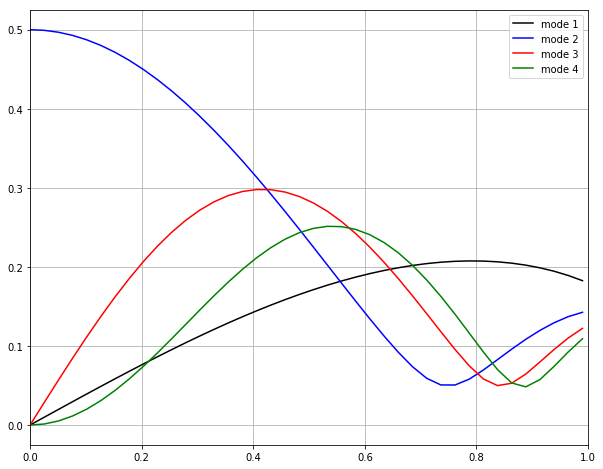

In [8]:
ee = np.linspace(0.0, 0.99, 40)
nn = np.array( [1,2,3,4])
colors = [ 'k-', 'b-', 'r-', 'g-']

print(ee)
print(np.sqrt(gwt.ggSimp(2,ee[3]))/2.0 )

fig, ax = plt.subplots( figsize=(10,8) )

icnt = 0
for ii in nn:
    astr = 'mode {}'.format(ii)
    yy = [ np.sqrt(gwt.ggSimp(ii,eee))/ii for eee in ee ]
    ax.plot(ee,  yy, colors[icnt], label=astr)
    icnt += 1
ax.set_xlim([0,1])
plt.grid(True)
plt.legend()
plt.show()


In [9]:
yy = np.sqrt(gwt.ggSimp(2,0.0))/2
print( yy )

0.5


In [10]:
gwt.ggSimp(1,0.0)

0.0

In [11]:
print( gwt.ggPM(4,0.0) )

0.0


/home/gabella/Documents/astro/exop/exoplanetsMath/python/gwTools.py:307: RuntimeWarning: overflow encountered in exp
  S_c = bigA*np.power( freq, -7/3 )*np.exp( bexp )*acoeff  # Eqn. (14) has a big, ol' A in front!!??
/home/gabella/Documents/astro/exop/exoplanetsMath/python/gwTools.py:307: RuntimeWarning: invalid value encountered in multiply
  S_c = bigA*np.power( freq, -7/3 )*np.exp( bexp )*acoeff  # Eqn. (14) has a big, ol' A in front!!??


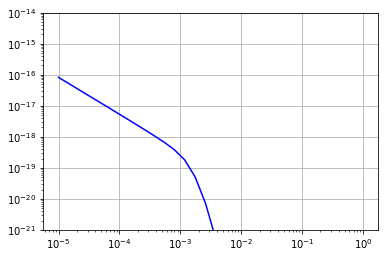

In [12]:
afreq = np.logspace( -5, 0, 30 )
Sconf = gwt.lisa_Sconf(3)
plt.loglog( afreq, np.sqrt( Sconf(afreq) ), 'b-' )
plt.ylim([1e-21, 1e-14])
plt.grid(True)
#plt.plot( afreq, Sconf(afreq), 'b-' )

## Cunha et al. exops plus PSR J1719-1438 b.

In [13]:
dbData.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
0,HD 142022 A,b,Radial Velocity,1928.0,2.93,0.5300,4.44,35.87,0.90,2018-04-26,27.88
1,HD 39091,b,Radial Velocity,2151.0,3.38,0.6405,10.27,18.21,1.10,2014-07-23,54.92
2,HD 137388 A,b,Radial Velocity,330.0,0.89,0.3600,0.20,38.45,0.68,2018-04-26,26.01


In [23]:
cunha = [ ['GP Com', 'b', '', 0.032, 2.28e5*1000./au, 0.0, 26.2, 75.0, 0.435, '', ''],
         ['V396 Hya', 'b', '', 0.045, 2.64e5*1000./au, 0.0, 18.3, 77, 0.345, '', ''],
         ['J1433', 'b', '', 0.054, 3.97e5*1000./au, 0.0, 57.1, 226, 0.8, '', ''],
         ['PSR J1719-14', 'b', '', 0.090, 6.58e5*1000./au, 0.06, 1.0, 1200., 1.4, '', '']]
dbCunha = pd.DataFrame(cunha, columns = ['pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_bmassj', 
          'st_dist', 'st_mass', 'rowupdate', 'st_plx'] )

In [24]:
dbCunha.head()

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx
0,GP Com,b,,0.032,0.001524,0.00,26.2,75.0,0.435,,
1,V396 Hya,b,,0.045,0.001765,0.00,18.3,77.0,0.345,,
2,J1433,b,,0.054,0.002654,0.00,57.1,226.0,0.800,,
3,PSR J1719-14,b,,0.090,0.004398,0.06,1.0,1200.0,1.400,,


In [25]:
help(gwt.hh)  # Start using the gwt.hh function below!!!
help(gwt.orbitalFreq)
help(gwt.hhModes)  # Use this one!!!

Help on function hh in module gwTools:

hh(nn, ee, m1, m2, a, dL)
    From Amaro-Seoane et al. 2010, the GW amplitude for GW mode nn in units of
    the orbital frequency, eccentricity ee, binary masses m1 and m2, 
    semi-major axis a, and distance to source dL.  Use SI units.
    Returns the GW amplitude for that frequency mode.
    Amaro-Seoane et al. Eqn. (9), refs Finn and Thorne 2000.

Help on function orbitalFreq in module gwTools:

orbitalFreq(m1, m2, a)
    Given two masses, m1 and m2, and the semimajor axis a,
    return the orbital frequency in Hz from Kepler relations.

Help on function hhModes in module gwTools:

hhModes(ee, m1, m2, a, dL, freq=0)
    From Amaro-Seoane et al. 2010, the GW amplitude for eccentricity ee, 
    binary masses m1 and m2, semi-major axis a, and distance to source dL.  Use SI units.
    If freq is zero, use Kepler and a to find the orbital period.
    Returns the tuple of (modes, GW amplitudes for those frequency modes).
    Amaro-Seoane et al. E

In [26]:
# Actually append n_min, n_max, numpy array of GW strains h.
# In the Mathematica JustStrainPlots.nb, about 40% down, calc hhVfreq first time.

hhmodesCol = []  # Setup a list of the hhmodes that will be appended to the dataframe.
modesCol = []    # The modes set acually used for the calculation, int(modeMin) to int(modeMax)+1
freq0Col = []    # Collect the orbital frequency that was used.

myDbase = dbCunha

for irow in range(len(myDbase)):
    # Calculate the SI parameters needed by the strains and the strain "front coefficient."
    
    orbeccen = myDbase['pl_orbeccen'].values[irow]
    modeMax = gwt.aNmax( orbeccen )  # The "max" mode number where g(n,e) returns to 1/20th its peak value.
    modeMin = gwt.aNmin( orbeccen )  # Either 1 for e>0 or 2 for e=0.
    #
    m1 = myDbase['pl_bmassj'].values[irow]*massJ
    m2 = myDbase['st_mass'].values[irow]*massSun
    smax = myDbase['pl_orbsmax'].values[irow]*au
    dL = myDbase['st_dist'].values[irow]*pc
    freq0 = 1.0/( myDbase['pl_orbper'].values[irow]*secsDay )
    # Amaro-Seoane Eqn. (9)...common terms.
    #frontCoeff = np.power(bigG,5/3.)/cee**4 * 2 * np.sqrt(32/5.) * np.power( gwt.chirpM(m1,m2), 5/3.)*\
    #np.power((2*np.pi*freq0), 2/3.)/dL
    #if irow > 6 and irow < 10:
    #    print('irow is ', irow, ' ,frontCoeff is ', frontCoeff, ' pl_orbeccen is ', orbeccen)

    # Now loop over the GW modes and calc the dim-less strain and the modes used.
    #hhmodes = [ frontCoeff* np.sqrt( gwt.ggSimp(uu, orbeccen) )/uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    #modes = [ uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    
    (modes, hhmodes) = gwt.hhModes(orbeccen, m1, m2, smax, dL, freq0)
    
    # Append to the list.
    hhmodesCol.append( hhmodes )
    modesCol.append( modes )
    freq0Col.append( freq0 )


In [27]:
# Check there is stuff in there.
print( len(hhmodesCol[0] ) )
print( hhmodesCol[0] )
print( modesCol[0] )

1
[1.1383348323540186e-22]
[2]


In [28]:
#Append the hhmodesCol to the dataframe, for ease of getting at the other attributes.
myDbase = dbCunha
myDbase['freq0'] = freq0Col
myDbase['modes'] = modesCol
myDbase['hhmodes'] = hhmodesCol

In [29]:
dbCunha.head()

,pl_hostname,pl_letter,pl_discmethod,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,st_dist,st_mass,rowupdate,st_plx,freq0,modes,hhmodes
0,GP Com,b,,0.032,0.001524,0.00,26.2,75.0,0.435,,,0.000362,[2],[1.1383348323540186e-22]
1,V396 Hya,b,,0.045,0.001765,0.00,18.3,77.0,0.345,,,0.000257,[2],[5.29798112248615e-23]
2,J1433,b,,0.054,0.002654,0.00,57.1,226.0,0.800,,,0.000214,[2],[8.689877324241371e-23]
3,PSR J1719-14,b,,0.090,0.004398,0.06,1.0,1200.0,1.400,,,0.000129,"[1, 2, 3]","[1.408632923620721e-26, 2.9988366754552183e-25..."


PSR J1719-14 and modes [1, 2, 3]
 and times orb freq [0.0001286 0.0002572 0.0003858]
[1.40863292e-26 2.99883668e-25 4.05027934e-26]


Text(0.5,1,'h modes for exops in Cunha Et Al. 2018')

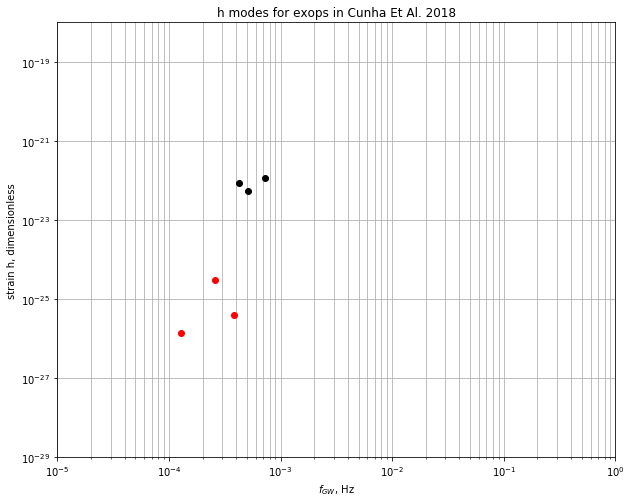

In [44]:
# Plot these on hh dimless strain plot.
fig, ax = plt.subplots( figsize=(10,8) )

for irow in range( len(myDbase) ):
    
    freq0 = 1.0/( myDbase['pl_orbper'].values[irow]*secsDay )
    xx = np.array( myDbase['modes'].values[irow] ) * freq0
    #  Needed the np.array() or saw an error that my list was not AN integer!!
    yy = np.array( myDbase['hhmodes'].values[irow] )

    # Plot xx and yy for ONE planet with crazy high eccentricity.
    acolor = 'ko'
    if myDbase['pl_hostname'].values[irow] == 'PSR J1719-14':
        acolor = 'ro'
        print('PSR J1719-14 and modes {}\n and times orb freq {}'.format( myDbase['modes'].values[irow], 
                                                                           xx ) )
        print('{}'.format( yy ) )
    ax.loglog(xx, yy, acolor)

plt.grid(which='both', axis='both')
if 1:
    plt.xlim([1e-5, 1e0])  # Hz, Cunha et al. Fig 2 
    plt.ylim([1e-29, 1e-18])  # dimless strain, Cunha et al. Fig 2
if 0:
    plt.xlim([1e-5, 1e0]) # Hz, us
    plt.ylim([1e-22, 1e-19])  # char strain, sqrt(f*S_n), us, Wong et al. Fig 1
plt.xlabel('$f_{GW}$, Hz')
plt.ylabel('strain h, dimensionless')
plt.title('h modes for exops in Cunha Et Al. 2018')

Cornish and Robson 2018 Eqn. 27 for fixed or nearly fixed frequency evolution over the measuring period
    $$ h_{BG} = \frac{8 T^{1/2} (G \mathcal{M} / c^3 )^{5/3} \pi^{2/3} f_{in}^{2/3} }{5^{1/2} (D_{L}/c) } $$
    

In [ ]:
# Actually append n_min, n_max, numpy array of GW strains h.
# In the Mathematica JustStrainPlots.nb, about 40% down, calc hhVfreq first time.

hhmodesCol = []  # Setup a list of the hhmodes that will be appended to the dataframe.
modesCol = []    # The modes set acually used for the calculation, int(modeMin) to int(modeMax)+1
freq0Col = []    # Collect the orbital frequency that was used.

myDbase = dbCunha

for irow in range(len(myDbase)):
    # Calculate the SI parameters needed by the strains and the strain "front coefficient."
    
    orbeccen = myDbase['pl_orbeccen'].values[irow]
    modeMax = gwt.aNmax( orbeccen )  # The "max" mode number where g(n,e) returns to 1/20th its peak value.
    modeMin = gwt.aNmin( orbeccen )  # Either 1 for e>0 or 2 for e=0.
    #
    m1 = myDbase['pl_bmassj'].values[irow]*massJ
    m2 = myDbase['st_mass'].values[irow]*massSun
    smax = myDbase['pl_orbsmax'].values[irow]*au
    dL = myDbase['st_dist'].values[irow]*pc
    freq0 = 1.0/( myDbase['pl_orbper'].values[irow]*secsDay )
    # Amaro-Seoane Eqn. (9)...common terms.
    #frontCoeff = np.power(bigG,5/3.)/cee**4 * 2 * np.sqrt(32/5.) * np.power( gwt.chirpM(m1,m2), 5/3.)*\
    #np.power((2*np.pi*freq0), 2/3.)/dL
    #if irow > 6 and irow < 10:
    #    print('irow is ', irow, ' ,frontCoeff is ', frontCoeff, ' pl_orbeccen is ', orbeccen)

    # Now loop over the GW modes and calc the dim-less strain and the modes used.
    #hhmodes = [ frontCoeff* np.sqrt( gwt.ggSimp(uu, orbeccen) )/uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    #modes = [ uu for uu in range(int(modeMin), int(modeMax)+1)  ]
    
    (modes, hhmodes) = gwt.hhModes(orbeccen, m1, m2, smax, dL, freq0)
    
    # Append to the list.
    hhmodesCol.append( hhmodes )
    modesCol.append( modes )
    freq0Col.append( freq0 )


PSR J1719-14 and modes [1, 2, 3]
 and times orb freq [0.0001286 0.0002572 0.0003858]
[1.59742217e-28 4.80938656e-27 7.95549997e-28]


Text(0.5,1,'h modes for exops in Cunha Et Al. 2018')

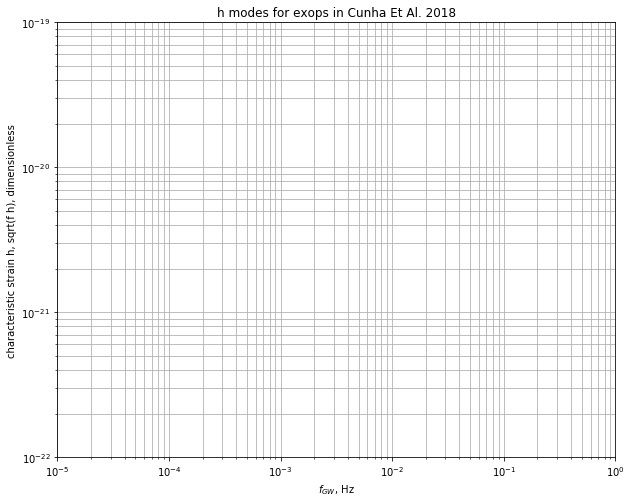

In [45]:
# Plot these on hh dimless strain plot.
fig, ax = plt.subplots( figsize=(10,8) )

for irow in range( len(myDbase) ):
    
    freq0 = 1.0/( myDbase['pl_orbper'].values[irow]*secsDay )
    xx = np.array( myDbase['modes'].values[irow] ) * freq0
    #  Needed the np.array() or saw an error that my list was not AN integer!!
    yy = np.array( myDbase['hhmodes'].values[irow] )*np.sqrt( xx )

    # Plot xx and yy for ONE planet with crazy high eccentricity.
    acolor = 'ko'
    if myDbase['pl_hostname'].values[irow] == 'PSR J1719-14':
        acolor = 'ro'
        print('PSR J1719-14 and modes {}\n and times orb freq {}'.format( myDbase['modes'].values[irow], 
                                                                           xx ) )
        print('{}'.format( yy ) )
    ax.loglog(xx, yy, acolor)

plt.grid(which='both', axis='both')
if 0:
    plt.xlim([1e-5, 1e0])  # Hz, Cunha et al. Fig 2 
    plt.ylim([1e-29, 1e-18])  # dimless strain, Cunha et al. Fig 2
if 1:
    plt.xlim([1e-5, 1e0]) # Hz, us
    plt.ylim([1e-22, 1e-19])  # char strain, sqrt(f*S_n), us, Wong et al. Fig 1
plt.xlabel('$f_{GW}$, Hz')
plt.ylabel('characteristic strain h, sqrt(f h), dimensionless')
plt.title('h modes for exops in Cunha Et Al. 2018')

In [46]:
np.sqrt( 2.0 * secsYear )

7944.398781531551